# Exercise 11-1: Create a multiple regression
Hima Tulasi

## Import the data

In [21]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
fish = pd.read_csv('Fish.csv')

In [23]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Clean the data

In [24]:
# read the info.txt file and rename the Length columns so they're more descriptive
info = pd.read_csv(r'info.txt')
info.to_csv(r'Info.csv',index=None)
fish.columns = ["Species", "Weight", "VerticalLength", "DiagonalLength", "CrossLength", "Height", "Width"]

## Identify a correlation

In [25]:
# get the correlation data for the Weight column
fish.corr()[['Weight']]


,Weight
Weight,1.000000
VerticalLength,0.915712
DiagonalLength,0.918618
CrossLength,0.923044
Height,0.724345
Width,0.886507


<AxesSubplot:>

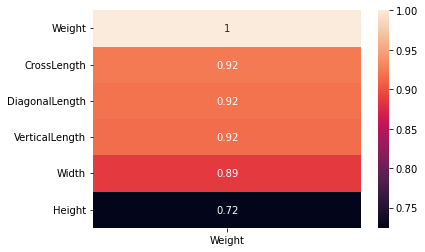

In [26]:
# create a heatmap for the correlation data
sns.heatmap(data=fish.corr()[['Weight']].sort_values('Weight', ascending=False), 
            annot=True)

## Create a multiple regression model

In [27]:
# filter the data so it only contains the values for the Bream species 
# and assign the resulting DataFrame to a variable named bream
bream = fish[fish['Species'] == 'Bream']



In [28]:
# split the training and test data 
x_train, x_test, y_train, y_test = train_test_split(
    bream[["CrossLength"]], bream[["Weight"]],
    test_size=0.5, random_state=20)


In [29]:
# create the model and fit the training data
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [30]:
# score the testing data
model.score(x_test,y_test)

0.8590181842902563

In [31]:
# make the predictions
y_predicted = model.predict(x_test)

In [32]:
# join the predicted data with the original data
predicted = pd.DataFrame(y_predicted, columns=['predictedWeight'])

final = predicted.join([x_test.reset_index(drop=True), 
                        y_test.reset_index(drop=True)])
final[['CrossLength','Weight','predictedWeight']].head()

,CrossLength,Weight,predictedWeight
0,34.0,430.0,424.474855
1,40.6,680.0,729.213422
2,37.3,340.0,576.844139
3,31.2,290.0,295.191827
4,36.2,475.0,526.054378


## Plot the residuals

In [33]:
# calculate the residuals and store them in a column
final['residual'] = final.Weight - final.predictedWeight
final


,predictedWeight,CrossLength,Weight,residual
0,424.474855,34.0,430.0,5.525145
1,729.213422,40.6,680.0,-49.213422
2,576.844139,37.3,340.0,-236.844139
3,295.191827,31.2,290.0,-5.191827
4,526.054378,36.2,475.0,-51.054378
5,535.288880,36.4,500.0,-35.288880
6,664.571908,39.2,685.0,20.428092
7,770.768681,41.5,714.0,-56.768681
8,401.388600,33.5,363.0,-38.388600
9,973.927725,45.9,975.0,1.072275


In [34]:
# create a KDE plot for the residuals

<AxesSubplot:xlabel='residual', ylabel='Density'>

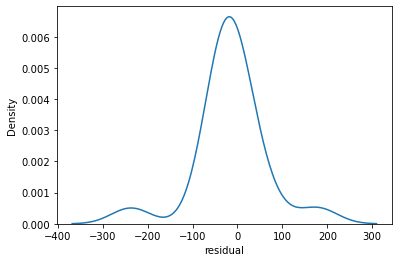

In [35]:
sns.kdeplot(data=final, x = 'residual')